# Iris Species Classifier

This ia a simple Classifier based on a Logistic regression model which would classify Iris flowers into it's different species based on the given input features like petal and sepal lengths.

# Importing Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

# Loading Data

In [104]:
iris = pd.read_csv('C:/Users/LENOVO/# Jupyter Notebook Files/Data Sets/Iris/iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Cleaning

* Detecting Null Values

In [105]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There seems to be no Null Values present

* Removing Redunant Features

In [106]:
iris.pop('Id')

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

* Converting Categorical data into Numerical data

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
species = LabelEncoder()
iris['species'] = species.fit_transform(iris['Species'])

iris.pop('Species')

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Separting Independant variables from Dependant variables

In [109]:
y = iris.pop('species')
x = iris

# Train Test Split

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

# Model Creation

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
iris_classifier = LogisticRegression()

# Training the Model

In [114]:
iris_classifier.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing the Model

In [115]:
species_classified = iris_classifier.predict(x_test)
species_classified

array([0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1,
       0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1])

# Accuracy of the Model


In [116]:
score = iris_classifier.score(x_test,y_test)
print("The Model classified the different species of the iris flower with an accuracy of {} % ".format(int(score*100)))

The Model classified the different species of the iris flower with an accuracy of 96 % 


# Confusion Matrix

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix_values = confusion_matrix(y_test,species_classified)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

Text(36.0, 0.5, 'Truth')

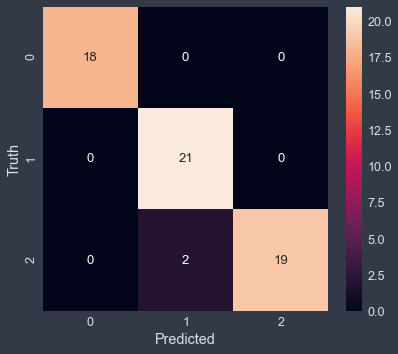

In [119]:
import seaborn as sns

sns.heatmap(confusion_matrix_values,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')